In [ ]:
!gdown --id 10_AqqIlHeMCOemFEgBzHBiIWM6iUwMPo

Downloading...
From: https://drive.google.com/uc?id=10_AqqIlHeMCOemFEgBzHBiIWM6iUwMPo
To: /content/data.zip
100% 69.5M/69.5M [00:01<00:00, 65.1MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: animals/
   creating: animals/cats/
  inflating: animals/cats/cats_00001.jpg  
  inflating: animals/cats/cats_00002.jpg  
  inflating: animals/cats/cats_00003.jpg  
  inflating: animals/cats/cats_00004.jpg  
  inflating: animals/cats/cats_00005.jpg  
  inflating: animals/cats/cats_00006.jpg  
  inflating: animals/cats/cats_00007.jpg  
  inflating: animals/cats/cats_00008.jpg  
  inflating: animals/cats/cats_00009.jpg  
  inflating: animals/cats/cats_00010.jpg  
  inflating: animals/cats/cats_00011.jpg  
  inflating: animals/cats/cats_00012.jpg  
  inflating: animals/cats/cats_00013.jpg  
  inflating: animals/cats/cats_00014.jpg  
  inflating: animals/cats/cats_00015.jpg  
  inflating: animals/cats/cats_00016.jpg  
  inflating: animals/cats/cats_00017.jpg  
  inflating: animals/cats/cats_00018.jpg  
  inflating: animals/cats/cats_00019.jpg  
  inflating: animals/cats/cats_00020.jpg  
  inflating: animals/cats/cats_00021.jpg  
  inflating: animals/cats/cat

In [ ]:
!pip uninstall torch
!pip install torch==1.8.0

Found existing installation: torch 1.9.0+cu111
Uninstalling torch-1.9.0+cu111:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.7/dist-packages/caffe2/*
    /usr/local/lib/python3.7/dist-packages/torch-1.9.0+cu111.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torch/*
Proceed (y/n)? y
  Successfully uninstalled torch-1.9.0+cu111
     |████████████████████████████████| 735.5 MB 8.2 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu111 requires torch==1.9.0, but you have torch 1.8.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.8.0 which is incompatible.


# Import lib

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as data
from torchvision import transforms

import cv2
from PIL import Image
import numpy as np

In [ ]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# AlexNet

In [ ]:
model = torchvision.models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# Feature Extraction

In [ ]:
# Reduce last fc layer for feature extraction
model.classifier = torch.nn.Sequential(*list(model.classifier.children())[:-1])
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root='/content/animals', transform=preprocess)
data_loader = data.DataLoader(dataset=dataset, batch_size=64, shuffle=False)

In [ ]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
features = []
label = []
for image, cls in data_loader:
  pred = model(image.to(device)).cpu().detach().numpy()
  features.extend(pred)
  label.extend(cls.numpy())

features = np.array(features)
label = np.array(label)

print(features.shape)
print(label.shape)

(800, 4096)
(800,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    label,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 4096) (640,)
(160, 4096) (160,)


In [ ]:
classifier = SVC(random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

# Evaluation

In [ ]:
accuracy_score(y_test, y_pred)

0.99375

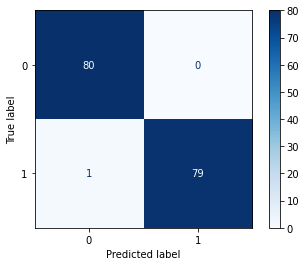

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues')